In [17]:
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from cinrad.visualize.utils import cmap_plot, norm_plot, prodname, save, plot_kw
import bz2
%matplotlib inline

In [18]:
moc_header = [
    ("label", "S4"),
    ("version", "S4"),
    ("file_bytes", "i4"),
    ("mosaic_id", "i2"),
    ("coordinate", "i2"),
    ("varname", "S8"),
    ("description", "S64"),
    ("block_pos", "i4"),
    ("block_len", "i4"),
    ("time_zone", "i4"),
    ("yr", "i2"),
    ("mon", "i2"),
    ("day", "i2"),
    ("hr", "i2"),
    ("min", "i2"),
    ("sec", "i2"),
    ("obs_seconds", "i4"),
    ("obs_dates", "u2"),
    ("gen_dates", "u2"),
    ("gen_seconds", "i4"),
    ("edge_s", "i4"),
    ("edge_w", "i4"),
    ("edge_n", "i4"),
    ("edge_e", "i4"),
    ("cx", "i4"),
    ("cy", "i4"),
    ("nx", "i4"),
    ("ny", "i4"),
    ("dx", "i4"),
    ("dy", "i4"),
    ("height", "i2"),
    ("compress", "i2"),
    ("num_of_radars", "i4"),
    ("unzip_bytes", "i4"),
    ("scale", "i2"),
    ("unused", "i2"),
    ("rgn_id", "S8"),
    ("units", "S8"),
    ("res1", "60c")
]

In [19]:
moc_header_dtype = np.dtype(moc_header)

In [20]:
f = open('/Users/zhaozh/Meteo/RadarData/RADA_L3_MST_CREF_QC/Z_RADA_C_BABJ_20230517065407_P_DOR_ACHN_CREF_20230517_064800.bin', 'rb')

In [21]:
header = np.frombuffer(f.read(256), moc_header_dtype)

In [22]:
# 1.	label[4]	char	0-3	文件固定标识：MOC
label = header['label']
# 2.	Version[4]	char	4-7	文件格式版本代码，如:,1.0，1.1，etc
version = header['version']
# 3.	FileBytes	int	8-11	包含头信息在内的文件字节数，不超过2M
file_bytes = header['file_bytes']
# 4.	MosaicID	short	12-13	拼图产品编号
mosaic_id = header['mosaic_id']
# 5.	coordinate	short	14-15	坐标类型:,2=笛卡儿坐标,3=等经纬网格坐标
coordinate = header['coordinate']
# 6.	varname[8]	char	16-23	产品代码,如:,ET,VIL,CR,CAP,OHP,OHPC
varname = header['varname']
# 7.	description[64];	char	24-87	产品描述，如Composite,Reflectivity,mosaic
description = header['description']
# 8.	BlockPos	int	88-91	产品数据起始位置(字节顺序)
block_pos = header['block_pos']
# 9.	BlockLen	int	92-95	产品数据字节数
block_len = header['block_len']
# 10.	TimeZone	int	96-99	数据时钟,0=世界时,28800=北京时
time_zone = header['time_zone']
# 11.	yr	short	100-101	观测时间中的年份
dt_yr = header['yr']
# 12. mon	short	102-103	观测时间中的月份（1－12）
dt_mon = header['mon']
# 13.	day	short	104-105	观测时间中的日期（1－31）
dt_day = header['day']
# 14.	hr	short	106-107	观测时间中的小时（00－23）
dt_hr = header['hr']
# 15.	min	short	108-109	观测时间中的分（00－59）
dt_min = header['min']
# 16.	sec	short	110-111	观测时间中的秒（00－59）
sec = header['sec']
# 17.	ObsSeconds	int	112-115	观测时间的seconds
obs_seconds = header['obs_seconds']
# 18.	ObsDates	unsigned short	116-117	观测时间中的Julian,dates
obs_dates = header['obs_dates']
# 19.	GenDates	Unsigned short	118-119	产品处理时间的天数
gen_dates = header['gen_dates']
# 20.	GenSeconds	int	120-123	产品处理时间的描述
gen_seconds = header['gen_seconds']
# 21.	edge_s	int	124-127	数据区的南边界，单位：1/1000度，放大1千倍
edge_s = float(header['edge_s']) / 1000
# 22.	edge_w	int	128-131	数据区的西边界，单位：1/1000度，放大1千倍
edge_w = float(header['edge_w']) / 1000
# 23.	edge_n	int	132-135	数据区的北边界，单位：1/1000度，放大1千倍
edge_n = float(header['edge_n']) / 1000
# 24.	edge_e	int	136-139	数据区的东边界，单位：1/1000度，放大1千倍
edge_e = float(header['edge_e']) / 1000
# 25.	cx	int	140-143	数据区中心坐标，单位：1/1000度，放大1千倍
cx = header['cx']
# 26.	cy	int	144-147	数据区中心坐标，单位：1/1000度，放大1千倍
cy = header['cy']
# 27.	nX	int	148-151	格点坐标为列数
nx = int(header['nx'])
# 28.	nY	int	152-155	格点坐标为行数
ny = int(header['ny'])
# 29.	dx	int	156-159	格点坐标为列分辨率，单位：1/10000度，放大1万倍
dx = float(header['dx']) / 10000
# 30.	dy	int	160-163	格点坐标为行分辨率，单位：1/10000度，放大1万倍
dy = float(header['dy']) / 10000
# 31.	height	short	164-165	雷达高度
height = header['height']
# 32.	Compress	short	166-167	数据压缩标识,,0=无,1=bz2,2=zip,3=lzw,,
compress = header['compress']
# 33.	num_of_radars	int	168-171 	有多少个雷达进行了拼图
num_of_radars = header['num_of_radars']
# 34.	UnZipBytes	int	172-175	数据段压缩前的字节数
unzip_bytes = header['unzip_bytes']
# 35.	scale	short	176-177	数据放大倍数，组合反射率目前是10倍
scale = int(header['scale'])
# 36.	unUsed	short	178-179	文件格式版本代码，如:,1.0，1.1，etc
unused = header['unused']
# 37.	RgnID[8]	char	180-187	包含头信息在内的文件字节数，不超过2M
rgn_id = header['rgn_id']
# 38.	units[8]	char	188-195	拼图产品编号
units = header['units']
# 39.	reserved[60];	char	196-255	坐标类型:,2=笛卡儿坐标,3=等经纬网格坐标
res1 = header['res1']

经度：73.0～135.0
纬度：12.2～54.2

In [34]:
edge_s

12.2

In [35]:
edge_w

73.0

In [36]:
edge_n

54.2

In [37]:
edge_e

135.0

## 文件头
nX，nY，。。 Compress 。。
## 数据块
nx*ny个short数组，根据Compress判断是否压缩，一般为bz压缩

In [23]:
# 格点数
header['nx'] * header['ny']

array([26040000], dtype=int32)

In [24]:
# 数据块为nX*nY（文件头中定义变量）个short类型数组，根据文件头中的Compress标志位判断是否压缩，数据按逐行顺序存储。
header['nx'] * header['ny'] * 2

array([52080000], dtype=int32)

In [25]:
# 读取数据块
f.seek(256)
block_data = f.read(int(block_len))

In [26]:

# 根据
if compress == 1:
    new_block_data = bz2.decompress(block_data)
else:
    new_block_data = block_data

In [27]:
len(new_block_data)

52080000

## 测试转int16
```python
np.frombuffer(b'\x01\x02\x03\x04\x05\x06', dtype=np.int16)
new_block_data[1]
```

原先方法
```python
result_list = []
for i in range(0, len(new_block_data), 2):
    value = np.frombuffer(new_block_data[i:i+2], dtype=np.int16)
    result_list.append(value)

len(result_list)
result_list[0]
raw = np.array(result_list).reshape(ny, nx) / scale
```

In [28]:
raw = np.frombuffer(new_block_data, dtype=np.int16).reshape(ny, nx) / int(scale)

In [29]:
raw

array([[-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       ...,
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8]])

In [30]:
lon = np.linspace(edge_w, edge_e, nx + 1)

In [31]:
lat = np.linspace(edge_n, edge_s, ny + 1)

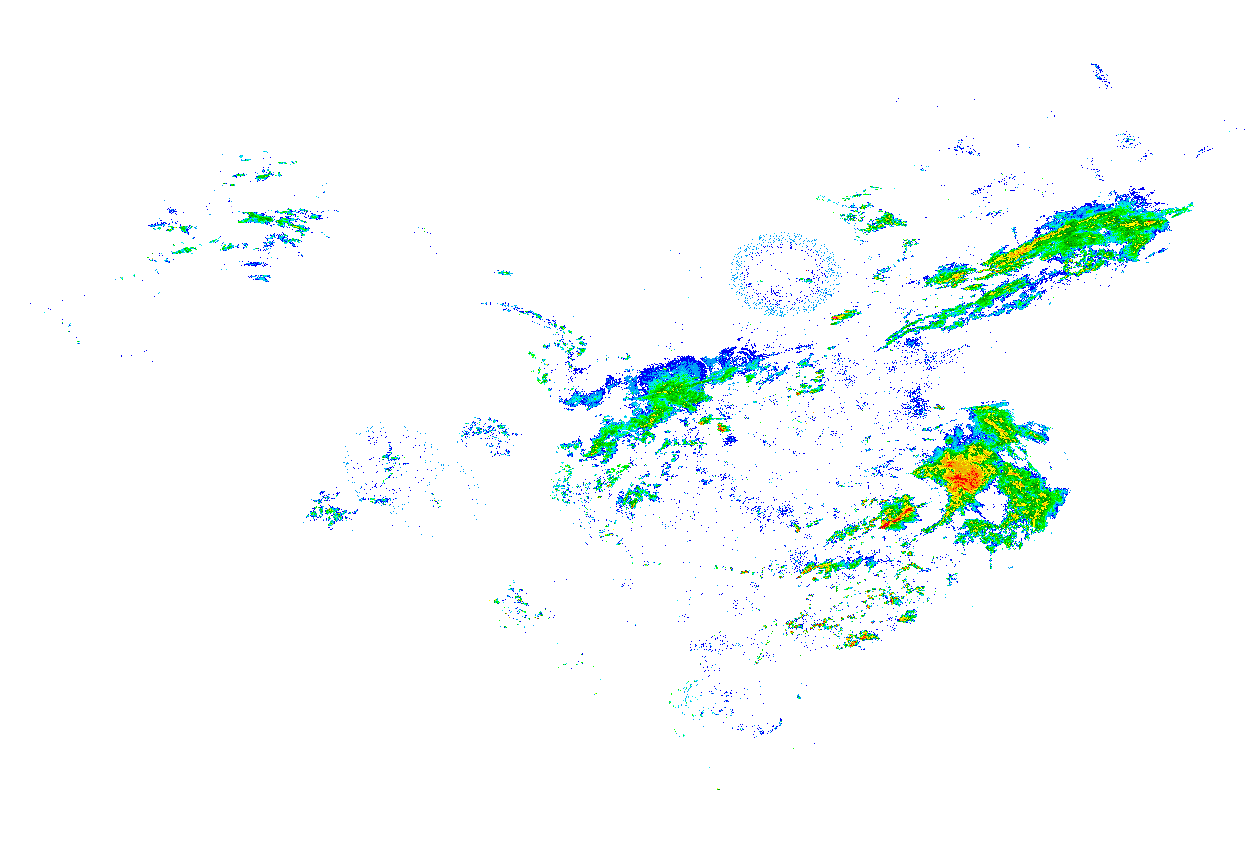

In [33]:
cmap_data = [(0.0, 0.0, 0.9647058823529412), (0.00392156862745098, 0.6274509803921569, 0.9647058823529412), (0.0, 0.9254901960784314, 0.9254901960784314), (0.00392156862745098, 1.0, 0.0), (0.0, 0.7843137254901961, 0.0), (0.00392156862745098, 0.5647058823529412, 0.0), (1.0, 1.0, 0.0), (0.9058823529411765, 0.7529411764705882, 0.0), (1.0, 0.5647058823529412, 0.0), (1.0, 0.0, 0.0), (0.8392156862745098, 0.0, 0.0), (0.7529411764705882, 0.0, 0.0), (1.0, 0.0, 0.9411764705882353), (0.47058823529411764, 0.0, 0.5176470588235295), (0.6784313725490196, 0.5647058823529412, 0.9411764705882353)]
# cmap = cmap_plot['REF']
cmap = colors.ListedColormap(cmap_data, 'REF')
norm = colors.Normalize(5, 70) #norm_plot['REF']
proj = ccrs.PlateCarree()
## 绘制图形
#画布第一
fig = plt.figure(figsize=(12.4, 8.4),dpi=100)
#绘图区声明
ax = fig.add_axes([0,0,1,1], projection = proj)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
# 布满画布
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
# 隐藏画布边框子图坐标
plt.axis('off')

# ax.imshow(raw, cmap=cmap, vmin=np.min(raw[raw != -3276.8]), vmax=np.max(raw))

# 缺测值
fill_value = 5
# 方法一
# mask = np.less(raw, fill_value)
# raw[mask] = np.nan
# 方法二
mask = raw < fill_value
raw = ma.array(raw, mask=mask) 

# ax.imshow(raw, cmap=cmap, norm=norm)
ax.pcolormesh(lon, lat, raw, cmap=cmap, norm=norm)

# 画海洋、陆地、河流、湖泊
# ax.add_feature(cfeature.OCEAN.with_scale('50m'))
# ax.add_feature(cfeature.LAND.with_scale('50m'))
# ax.add_feature(cfeature.RIVERS.with_scale('50m'))
# ax.add_feature(cfeature.LAKES.with_scale('50m'))